[494, 399.5, 415, 415, 396.5, 447, 549, 631.5, 597, 495.5, 350.5, 203, 170.5, 306.5, 496.5, 552, 443, 312.5, 279.5, 315.5, 406, 508, 542.5, 461.5, 326.5, 195, 81.5, 91, 240, 421.5, 510, 515, 447, 351.5, 265, 200.5, 171, 263.5, 510, 652, 610.5, 398.5, 197.5, 43.5, -18, 146, 380, 563.5, 467.5, 265, 131, 72.5, 98.5, 90, 97.5, 49.5, -75, -154.5, 34.5, 376.5, 558.5, 461, 139, -50, 8, 162, 170.5, -20.5, -124.5, -14.5, 198.5, 251, -23.5, -249, -138, 183, 447, 350.5, 13.5, -331, -489, -283, 75.5, 256.5, 100, -275.5, -421.5, -238, -50.5, 64.5, 134, 205.5, 184.5, 5.5, -168, -255.5, -88.5, 246.5, 309.5, 161.5, 68, 56.5, 162.5, 165.5, 32, 15.5, 181, 392.5, 328.5, 92.5, 47, 156, 394, 773.5, 1041.5, 1081.5, 789, 128.5, -412, -285.5, 228.5, 436, 432.5, 544.5, 726, 944, 1036, 897, 749.5, 761, 942, 1110, 1201, 1341, 1563, 1903.5, 2078, 1907.5, 1575, 1179.5, 858, 940.5, 1545.5, 2320, 2802.5, 2937, 2820, 2436.5, 2154, 1955, 1765.5, 1792.5, 1707.5, 1307, 921.5, 993.5, 1363.5, 1693, 1738, 1267.5, 415.5, -2

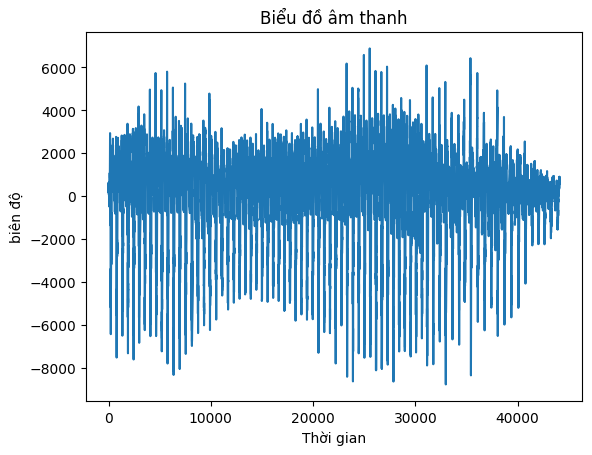

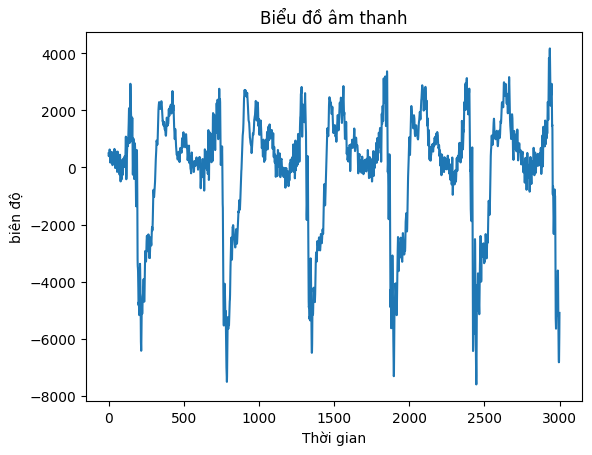

In [19]:
import json
import matplotlib.pyplot as plt
import numpy as np
# Mở file JSON
with open("./training/Snore.Thanh.WAV.44u5bgjh.ingestion-6bb4987c-vcm6n.s3.json", "r") as f:
    data = json.load(f)
  
print(data["payload"]["values"])
print(len(data["payload"]["values"]))
audio_data = data["payload"]["values"]

plt.plot(audio_data)
plt.title('Biểu đồ âm thanh')
plt.xlabel('Thời gian')
plt.ylabel('biên độ')
plt.show()
# Lặp qua dữ liệu

plt.plot(audio_data[0:3000])
plt.title('Biểu đồ âm thanh')
plt.xlabel('Thời gian')
plt.ylabel('biên độ')
plt.show()

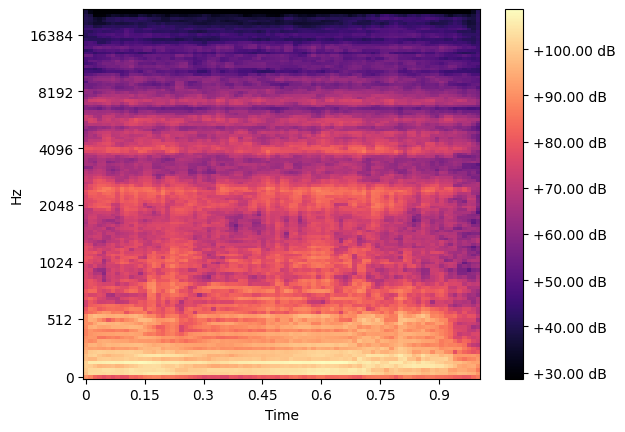

In [20]:
import librosa.display

audio_data = np.array(audio_data).astype("float")
sgram = librosa.stft(audio_data)
# librosa.display.specshow(sgram)
sgram_mag, _  = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr =44100)
# librosa.display.specshow(mel_scale_sgram)
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram , ref=np.min)
librosa.display.specshow(mel_sgram ,sr =44100, x_axis="time", y_axis="mel")
plt.colorbar(format='%+0.2f dB')

In [21]:
import librosa
import librosa.display
import torch

def calcuMelSgram(signal):
  sgram = librosa.stft(signal)  
  sgram_mag, _  = librosa.magphase(sgram)
  mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr = 44100)
  mel_sgram = librosa.amplitude_to_db(mel_scale_sgram , ref=np.min)
  t = torch.Tensor(mel_sgram)
  print(t)
  return t

In [22]:
import os
import json
import matplotlib.pyplot as plt

# Định nghĩa thư mục
directory = "./training"
train = []
# Duyệt qua tất cả file trong thư mục
for filename in os.listdir(directory):
    print(filename)
    if filename.startswith("Snore"):
        label = 1
    else:
        label = 0
    if(filename == "info.labels"):
        continue
    with open("./training/"+filename, "r") as f:
            acoustic = json.load(f)
    audio_data = np.array(acoustic["payload"]["values"]).astype(np.float64)
    train.append({"acoustic_data": calcuMelSgram(audio_data), "label": label, "fileName":filename})
  
    


info.labels
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s1.json
tensor([[76.4918, 77.4853, 78.6087,  ..., 86.3279, 86.5909, 84.7009],
        [87.2722, 89.2687, 85.3731,  ..., 90.9854, 90.1023, 88.3604],
        [90.3036, 91.4247, 85.9788,  ..., 87.2267, 83.3707, 83.8075],
        ...,
        [39.1809, 33.1502, 27.7662,  ..., 27.7662, 30.8381, 38.7589],
        [39.1406, 33.1109, 27.7662,  ..., 27.7662, 30.8020, 38.7232],
        [39.0963, 33.0640, 27.7662,  ..., 27.7662, 30.7496, 38.6731]])
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s10.json
tensor([[81.2874, 82.2779, 77.0452,  ..., 78.1857, 82.2706, 82.7485],
        [81.3569, 81.5166, 82.4456,  ..., 86.2135, 88.3794, 85.1097],
        [77.6393, 73.0817, 80.9428,  ..., 81.4012, 80.0697, 77.2440],
        ...,
        [34.4939, 34.4939, 34.4939,  ..., 34.4939, 34.4939, 34.4939],
        [34.4939, 34.4939, 34.4939,  ..., 34.4939, 34.4939, 34.4939],
        [34.4939, 34.4939, 34.4939,  ..., 34.4939, 34.49

In [23]:
import os
import json
import matplotlib.pyplot as plt

# Định nghĩa thư mục
directory = "./testing"
test = []
# Duyệt qua tất cả file trong thư mục
for filename in os.listdir(directory):
    print(filename)
    if filename.startswith("Snore"):
        label = 1
    else:
        label = 0
    if(filename == "info.labels"):
        continue
    with open("./testing/"+filename, "r") as f:
            acoustic = json.load(f)
    audio_data = np.array(acoustic["payload"]["values"]).astype(np.float64)
    test.append({"acoustic_data": calcuMelSgram(audio_data), "label": label, "fileName":filename})
    

info.labels
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s30.json
[  575.   605.   647. ... -3735. -3440. -3107.]
tensor([[78.7437, 79.3776, 78.2741,  ..., 82.2485, 82.9364, 80.2525],
        [84.4803, 90.5291, 90.5339,  ..., 88.1609, 88.0813, 86.2445],
        [78.2750, 89.2148, 88.8835,  ..., 88.1288, 83.2937, 83.4006],
        ...,
        [34.4236, 32.8077, 32.8077,  ..., 32.8077, 40.5243, 48.4518],
        [34.3415, 32.8077, 32.8077,  ..., 32.8077, 40.4805, 48.4075],
        [34.3394, 32.8077, 32.8077,  ..., 32.8077, 40.4435, 48.3711]])
[[78.74371338 79.37762451 78.27409363 ... 82.24846649 82.93639374
  80.25254059]
 [84.48025513 90.52911377 90.53386688 ... 88.1608963  88.08126068
  86.24446869]
 [78.27500153 89.21479034 88.88348389 ... 88.12884521 83.29366302
  83.40055847]
 ...
 [34.42356491 32.80774689 32.80774689 ... 32.80774689 40.5243187
  48.45178223]
 [34.34149933 32.80774689 32.80774689 ... 32.80774689 40.48053741
  48.40752792]
 [34.33944321 32.80774689 32.

                                       acoustic_data  label   
0  [[tensor(76.4918), tensor(77.4853), tensor(78....      0  \
1  [[tensor(81.2874), tensor(82.2779), tensor(77....      0   
2  [[tensor(67.9462), tensor(76.8482), tensor(78....      0   
3  [[tensor(73.7821), tensor(78.7396), tensor(81....      0   
4  [[tensor(76.2985), tensor(73.8407), tensor(70....      0   

                                            fileName  
0  No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f6...  
1  No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f6...  
2  No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f6...  
3  No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f6...  
4  No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f6...  


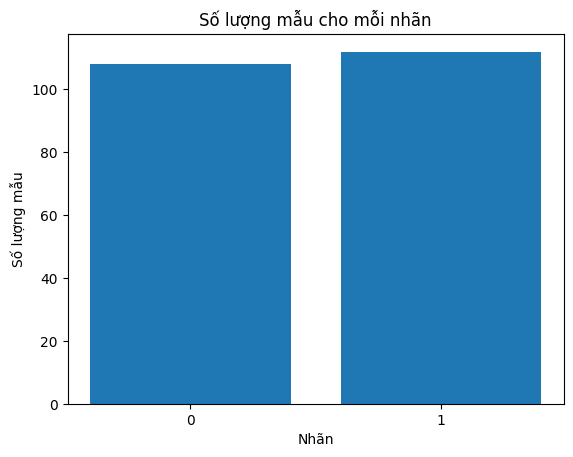

In [24]:
import pandas as pd
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)


print(train_df.head())
label_counts = test_df['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Nhãn')
plt.ylabel('Số lượng mẫu')
plt.title('Số lượng mẫu cho mỗi nhãn')
plt.xticks([0, 1])
plt.show()

torch.Size([128, 87])
[tensor([[76.4918, 77.4853, 78.6087,  ..., 86.3279, 86.5909, 84.7009],
         [87.2722, 89.2687, 85.3731,  ..., 90.9854, 90.1023, 88.3604],
         [90.3036, 91.4247, 85.9788,  ..., 87.2267, 83.3707, 83.8075],
         ...,
         [39.1809, 33.1502, 27.7662,  ..., 27.7662, 30.8381, 38.7589],
         [39.1406, 33.1109, 27.7662,  ..., 27.7662, 30.8020, 38.7232],
         [39.0963, 33.0640, 27.7662,  ..., 27.7662, 30.7496, 38.6731]])
 tensor([[81.2874, 82.2779, 77.0452,  ..., 78.1857, 82.2706, 82.7485],
         [81.3569, 81.5166, 82.4456,  ..., 86.2135, 88.3794, 85.1097],
         [77.6393, 73.0817, 80.9428,  ..., 81.4012, 80.0697, 77.2440],
         ...,
         [34.4939, 34.4939, 34.4939,  ..., 34.4939, 34.4939, 34.4939],
         [34.4939, 34.4939, 34.4939,  ..., 34.4939, 34.4939, 34.4939],
         [34.4939, 34.4939, 34.4939,  ..., 34.4939, 34.4939, 34.4939]])
 tensor([[67.9462, 76.8482, 78.1143,  ..., 74.0107, 74.8400, 76.8342],
         [81.2455, 87.438

(862,)

In [27]:
x_train = np.array(train_df["acoustic_data"])
y_train = np.array(train_df["label"])

x_test = np.array(test_df["acoustic_data"])
y_test = np.array(test_df["label"])


In [28]:
import numpy as np
from keras.optimizers import RMSprop,Adam





# x_train_tf = np.array([data.reshape(-1, 128, 87, 1) for data in train_df["acoustic_data"]])

# x_test_tf = np.array([data.reshape(-1, 128, 87, 1) for data in test_df["acoustic_data"]])


from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,87,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# In tóm tắt mô hình
model.summary()

# Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 87, 8)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 43, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64, 43, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 43, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 21, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 21, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,752,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,756,714 (10.52 MB)

 Trainable params: 2,756,714 (10.52 MB)

 Non-trainable params: 0 (0.00 B)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Tensor).